In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
emotion_score = pd.read_csv('London_score_raw.txt', index_col=0, sep='\s+')
emotion_score.index = emotion_score.index.astype('datetime64[ns]')
emotion_score.tail()

,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise,lat,lon,emotion_score
photo_take_date,,,,,,,,,,,
2012-04-27,0.002571,0.034591,0.003117,7.541410e-04,0.077213,0.639780,0.001574,0.240400,51.507246,-0.125999,-0.375726
2012-04-27,0.000804,0.002184,0.001057,5.632771e-04,0.000690,0.691425,0.301772,0.001505,51.507246,-0.125999,-0.470239
2012-07-23,0.000004,0.000258,0.000001,5.163571e-07,0.983578,0.016082,0.000053,0.000023,51.504600,-0.175050,0.716601
2012-07-23,0.000763,0.003948,0.002667,1.764461e-05,0.928100,0.062454,0.001908,0.000142,51.504600,-0.175050,0.644335
2013-05-04,0.000004,0.000077,0.000021,1.498473e-07,0.998305,0.001584,0.000001,0.000008,51.539072,-0.058398,0.737250


In [3]:
stock = pd.read_csv('FTSE100_data.txt', sep='\s+', index_col=0)
stock.index = stock.index.astype('datetime64[ns]')
stock.tail()

,Open,High,Low,Close
Date,,,,
2016-12-22,7041.42,7063.68,7020.13,7063.68
2016-12-23,7063.68,7071.11,7054.64,7068.17
2016-12-28,7068.17,7109.37,7060.85,7106.08
2016-12-29,7106.08,7120.26,7074.47,7120.26
2016-12-30,7120.26,7142.83,7087.54,7142.83


数据读入完毕，开始按照一定的时间段进行汇总并计算相关性

按照周来进行相关（之前有考虑过照片过少而导致的拟合的问题，现在先不考虑这个情况）  
`count = emotion_score['emotion_score'].resample('MS').count()`

In [4]:
gp1 = emotion_score['emotion_score'].resample('MS').mean()
std1 = gp1.std()
miu1 = gp1.mean()
gp11 = (gp1-miu1)/std1  ## 此处进行了汇总之后才进行了归一化，如果不做汇总，归一化结果图像是沿着坐标中紧密波动的
gp11.tail()

photo_take_date
2016-09-01   -0.432233
2016-10-01    0.278995
2016-11-01    0.656334
2016-12-01    0.198482
2017-01-01    2.913540
Freq: MS, Name: emotion_score, dtype: float64

In [5]:
gp2 = stock['Close'].resample('MS').mean()
std2 = gp2.std()
miu2 = gp2.mean()
gp22 = (gp2-miu2) /std2
gp22.tail()

Date
2016-08-01    1.021576
2016-09-01    0.996531
2016-10-01    1.473361
2016-11-01    0.976113
2016-12-01    1.353792
Freq: MS, Name: Close, dtype: float64

相关系数 为 0.17640538934100725


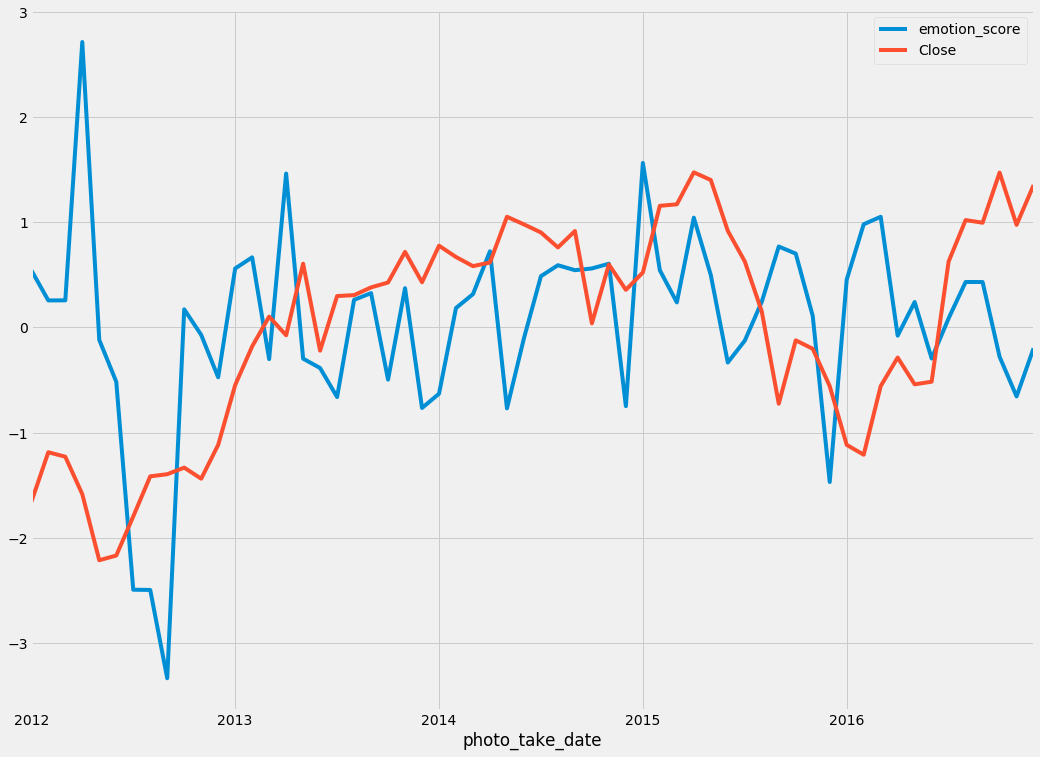

In [6]:
df = pd.concat([-gp11, gp22], axis=1, join='inner')
df.plot()
print("相关系数 为 {}".format(df.corr()['emotion_score']['Close']))